In [1]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
df = pd.read_csv('income.csv')
df.head()

,Name,Age,Income($)
0,Rob,27,70000
1,Michael,29,90000
2,Mohan,29,61000
3,Ismail,28,60000
4,Kory,42,150000


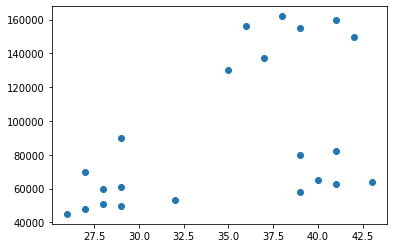

In [5]:
plt.scatter(df.Age,df['Income($)'])

In [7]:
km = KMeans(n_clusters=3)   #it is clear in this example
km

KMeans(n_clusters=3)

In [8]:
y_predicted = km.fit_predict(df[['Age','Income($)']])

In [9]:
y_predicted

array([2, 2, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0])

In [10]:
df['cluster'] = y_predicted
df

,Name,Age,Income($),cluster
0,Rob,27,70000,2
1,Michael,29,90000,2
2,Mohan,29,61000,0
3,Ismail,28,60000,0
4,Kory,42,150000,1
5,Gautam,39,155000,1
6,David,41,160000,1
7,Andrea,38,162000,1
8,Brad,36,156000,1
9,Angelina,35,130000,1


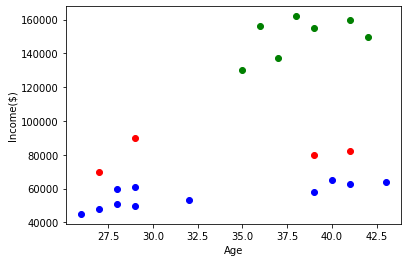

In [21]:
df1 = df[df.cluster==0]
df2 = df[df.cluster==1]
df3 = df[df.cluster==2]
plt.scatter(df1.Age,df1['Income($)'],color='b')
plt.scatter(df2.Age,df2['Income($)'],color='g')
plt.scatter(df3.Age,df3['Income($)'],color='r')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.show()

# This happend because scaling is not proper

In [22]:
scaler = MinMaxScaler()

In [25]:
scaler.fit(df[['Income($)']])
df['Income($)'] = scaler.transform(df[['Income($)']])
scaler.fit(df[['Age']])
df['Age'] = scaler.transform(df[['Age']])
df

,Name,Age,Income($),cluster
0,Rob,0.058824,0.213675,2
1,Michael,0.176471,0.384615,2
2,Mohan,0.176471,0.136752,0
3,Ismail,0.117647,0.128205,0
4,Kory,0.941176,0.897436,1
5,Gautam,0.764706,0.940171,1
6,David,0.882353,0.982906,1
7,Andrea,0.705882,1.000000,1
8,Brad,0.588235,0.948718,1
9,Angelina,0.529412,0.726496,1


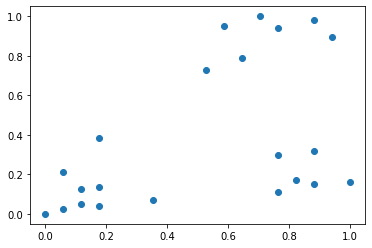

In [29]:
plt.scatter(df.Age,df['Income($)'])

In [30]:
km = KMeans(n_clusters=3)
y_predicted = km.fit_predict(df[['Age','Income($)']])
y_predicted

array([1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0])

In [32]:
df.drop('cluster',axis=1,inplace=True)
df['clusters'] =y_predicted
df

,Name,Age,Income($),clusters
0,Rob,0.058824,0.213675,1
1,Michael,0.176471,0.384615,1
2,Mohan,0.176471,0.136752,1
3,Ismail,0.117647,0.128205,1
4,Kory,0.941176,0.897436,2
5,Gautam,0.764706,0.940171,2
6,David,0.882353,0.982906,2
7,Andrea,0.705882,1.000000,2
8,Brad,0.588235,0.948718,2
9,Angelina,0.529412,0.726496,2


In [35]:
km.cluster_centers_

array([[0.85294118, 0.2022792 ],
       [0.1372549 , 0.11633428],
       [0.72268908, 0.8974359 ]])

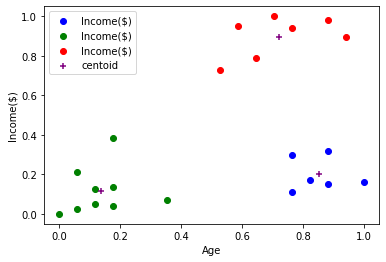

In [41]:
df1 = df[df.clusters==0]
df2 = df[df.clusters==1]
df3 = df[df.clusters==2]
plt.scatter(df1.Age,df1['Income($)'],color='b',label='Income($)')
plt.scatter(df2.Age,df2['Income($)'],color='g',label='Income($)')
plt.scatter(df3.Age,df3['Income($)'],color='r',label='Income($)')
plt.xlabel('Age')
plt.ylabel('Income($)')
plt.scatter(km.cluster_centers_[0,0],km.cluster_centers_[0,1],color='purple',marker='+',label='centoid')
plt.scatter(km.cluster_centers_[1,0],km.cluster_centers_[1,1],color='purple',marker='+')
plt.scatter(km.cluster_centers_[2,0],km.cluster_centers_[2,1],color='purple',marker='+')
plt.legend()
plt.show()

In [43]:
k_rng = range(1,10)
sse = []
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)     #km.inertia_  gives SSE

In [44]:
sse

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.26217927623452125,
 0.22020960864009392,
 0.16858512236029757,
 0.1376250414652804,
 0.10663983840905437]

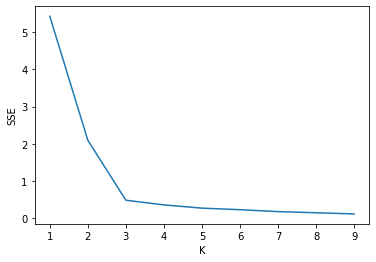

In [45]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)

In [46]:
k_rng = range(1,22)
sse = []
for k in k_rng:
    km=KMeans(n_clusters=k)
    km.fit(df[['Age','Income($)']])
    sse.append(km.inertia_)
    
sse    

[5.434011511988176,
 2.0911363886990766,
 0.47507834985530945,
 0.34910470944195643,
 0.26217927623452125,
 0.21578607765873017,
 0.16858512236029757,
 0.1326541982724516,
 0.10383752586603559,
 0.08026197041664464,
 0.06667741899198737,
 0.04681168434939174,
 0.03974516641427297,
 0.030426552928992823,
 0.02336003499387405,
 0.01641649105272562,
 0.011033819491365383,
 0.007513957485122411,
 0.0054551225809321684,
 0.003578916064498534,
 0.0017666294837796928]

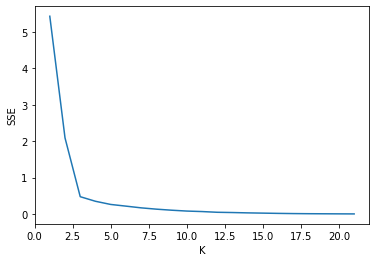

In [51]:
plt.xlabel('K')
plt.ylabel('SSE')
plt.plot(k_rng,sse)